![](CintillaTecNM-ITD.png)

# Simulación

## Unidad 3. Variables Aleatorias 

### Facilitador: José Gabriel Rodríguez Rivas

<div style="color: blue;">
<h2> Practica 4: Simular la demanda diaria de clientes en una tienda de telefono móviles.
</div>

### 1. **Contexto de la situación**

Imagina que una tienda en línea gestiona inventarios de productos tecnológicos, como **teléfonos móviles**. La demanda diaria de estos productos varía de manera impredecible, influenciada por promociones, tendencias y comportamientos de los clientes. El desafío para los gestores de inventarios es mantener el **stock óptimo**: si tienen demasiados productos en inventario, incurren en costos de almacenamiento, pero si el stock es insuficiente, pierden ventas y clientes.

Para optimizar la gestión de inventarios, es fundamental modelar la **demanda diaria de clientes** como una **variable aleatoria**. De esta manera, se pueden realizar simulaciones que permitan calcular el nivel de inventario que minimice los costos y maximice las ventas, mientras se satisface la demanda en la mayoría de los días.

### 2. **Justificación de la distribución de probabilidad**

En este caso, una **distribución Poisson** es la más adecuada para modelar la **demanda diaria de clientes** por varias razones:

- **Demanda discreta**: La demanda diaria es un número entero de unidades (por ejemplo, 1, 2, 3 teléfonos móviles). La distribución Poisson es ideal para modelar eventos discretos que ocurren dentro de un periodo fijo de tiempo.
- **Promedio constante**: Aunque la demanda varía diariamente, la distribución Poisson asume que el promedio (o tasa) de eventos (en este caso, la demanda de clientes) es constante. Esto es realista para productos que no tienen grandes fluctuaciones diarias, pero experimentan variaciones pequeñas alrededor de un promedio.
- **Eventos independientes**: La demanda de un día es generalmente independiente de la demanda de otro día, lo que es consistente con la propiedad de la independencia en la distribución Poisson.

### Aplicación del **método de la transformada inversa** con la distribución Poisson

El método de la **transformada inversa** se puede utilizar para generar variables aleatorias que siguen una distribución Poisson, representando la demanda diaria de los clientes.

#### Pasos para aplicar la transformada inversa con una distribución Poisson:

1. **Función de distribución acumulada (FDA)**: Para la distribución Poisson, la FDA no tiene una forma cerrada simple, pero se puede aproximar sumando las probabilidades acumuladas para diferentes valores de la demanda.

2. **Generar un número aleatorio uniforme \( U \)**: Generamos un número aleatorio uniforme \( U \) entre 0 y 1.

3. **Aplicar la transformada inversa**: Encontramos el menor valor \( x \) tal que la función de distribución acumulada \( F(x) \geq U \). Este valor \( x \) será el valor de la demanda diaria simulada.


### 3. **Contexto de la simulación y justificación**

#### Contexto:
- **Simulación de demanda**: En este ejemplo, la tienda puede utilizar la simulación de la demanda diaria de clientes para prever cuántos productos venderán en un período determinado.
- **Optimización del inventario**: La tienda puede ejecutar múltiples simulaciones de demanda para calcular cuál es el nivel de stock que cubrirá la mayoría de los días sin quedarse corto, al tiempo que minimiza el exceso de inventario.

#### Justificación del uso de la **distribución Poisson**:
- **Datos históricos**: Si la tienda tiene datos históricos que muestran que la demanda diaria oscila alrededor de un promedio constante (por ejemplo, 5 productos al día), la distribución Poisson es ideal para modelar estos eventos.
- **Modelado de eventos raros**: La distribución Poisson también es útil para modelar eventos raros como días con muy alta demanda, algo que puede ocurrir durante promociones o ventas especiales.

*El método de la transformada inversa con la distribución Poisson permite generar variables aleatorias que simulan la demanda de los clientes.*   

*Es útil para gestionar los niveles de inventario en un sistema donde la demanda diaria varía de manera aleatoria, ayudando a reducir costos de almacenamiento y pérdida de ventas.*

Demanda diaria simulada: [4, 6, 5, 2, 4, 9, 6, 5, 7, 3, 2, 7, 4, 6, 2, 4, 4, 5, 2, 9, 5, 4, 2, 5, 3, 5, 4, 6, 4, 1, 7, 6, 3, 8, 3, 5, 6, 4, 6, 9, 4, 1, 5, 7, 4, 7, 7, 5, 4, 7, 5, 3, 4, 7, 4, 4, 4, 7, 10, 0, 3, 3, 3, 5, 3, 7, 3, 8, 4, 2, 4, 7, 2, 3, 5, 3, 4, 4, 4, 4, 0, 4, 5, 5, 5, 9, 5, 7, 7, 4, 2, 1, 11, 4, 8, 2, 4, 6, 4, 5]


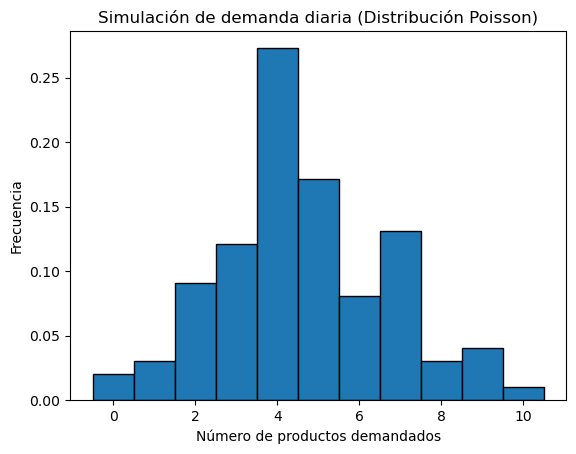

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de la distribución Poisson (media de la demanda diaria)
lambda_poisson = 5  # Por ejemplo, 5 teléfonos móviles por día

# Generar una variable aleatoria uniforme U ~ Uniform(0, 1)
n = 100  # Número de simulaciones
U = np.random.uniform(0, 1, n)

# Aplicar la transformada inversa para la distribución Poisson
def poisson_inverse_transform(lambda_poisson, U):
    k = 0
    F_k = np.exp(-lambda_poisson)  # Primera probabilidad acumulada (k=0)
    while U > F_k:
        k += 1
        F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / np.math.factorial(k)
    return k

# Generar demanda simulada usando transformada inversa
demanda_simulada = [poisson_inverse_transform(lambda_poisson, u) for u in U]

# Mostrar los resultados
print("Demanda diaria simulada:", demanda_simulada)

# Graficar histograma de la demanda simulada
plt.hist(demanda_simulada, bins=np.arange(0, max(demanda_simulada) + 1) - 0.5, edgecolor='black', density=True)
plt.title("Simulación de demanda diaria (Distribución Poisson)")
plt.xlabel("Número de productos demandados")
plt.ylabel("Frecuencia")
plt.show()
